# Mini Project 2
##### by Jacynn

## Chocolate Bar Rating Prediction

Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billion pounds. However, not all chocolate bars are created equal! 

This dataset contains expert ratings of over 2,000 individual chocolate bars, along with information on their company made and location, percentage of cocoa, the variety of chocolate bean used and where the beans were grown, igredients added (cocoa butter, vanilla, lecithin, salt, sugar, sweetener), taste perceived and last but not least the ratings. The database is narrowly focused on plain dark chocolate to appreciate the flavors of the cacao when made into chocolate. The ratings do not reflect health benefits, social missions, or organic status.


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

%matplotlib inline

## Data Exploration and Cleaning

In [105]:
#Read dataset & check head
choc = pd.read_csv('chocolate.csv', index_col=0)
choc.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [106]:
#Find shape
choc.shape

(2224, 20)

In [107]:
#Describe dataset
choc.describe()

,ref,review_date,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,1337.010342,2013.857914,71.493930,3.198561,3.075989
std,693.959768,3.582151,5.278253,0.434329,0.929875
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,776.000000,2011.000000,70.000000,3.000000,2.000000
50%,1381.000000,2014.000000,70.000000,3.250000,3.000000
75%,1928.000000,2016.000000,74.000000,3.500000,4.000000
max,2490.000000,2020.000000,100.000000,4.000000,6.000000


In [108]:
#Check infomation and types of dataset
choc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 0 to 2223
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2224 non-null   int64  
 1   company                           2224 non-null   object 
 2   company_location                  2224 non-null   object 
 3   review_date                       2224 non-null   int64  
 4   country_of_bean_origin            2224 non-null   object 
 5   specific_bean_origin_or_bar_name  2224 non-null   object 
 6   cocoa_percent                     2224 non-null   float64
 7   rating                            2224 non-null   float64
 8   counts_of_ingredients             2224 non-null   int64  
 9   beans                             2224 non-null   object 
 10  cocoa_butter                      2224 non-null   object 
 11  vanilla                           2224 non-null   object 
 12  lecith

In [109]:
choc.isnull().sum()

ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

In [110]:
#Drop unrelevant columns and drop third, fourth taste columns (high number of NaN) 
choc.drop(['ref', 'review_date','third_taste','fourth_taste'], axis=1, inplace=True)
choc.head()

,company,company_location,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste
0,5150,U.S.A,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry
1,5150,U.S.A,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal
2,5150,U.S.A,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty
3,A. Morin,France,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon
4,A. Morin,France,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty


In [111]:
#Find most frequent second_taste
choc['second_taste'].value_counts().head(10)

sweet     115
nutty      83
earthy     70
roasty     65
cocoa      64
floral     58
fatty      49
spicy      43
woody      41
sour       40
Name: second_taste, dtype: int64

In [112]:
#Replace NaN with most frequent taste in second_taste
choc['second_taste'].replace((np.nan, 'sweet'), inplace=True)
choc.isnull().sum()

company                             0
company_location                    0
country_of_bean_origin              0
specific_bean_origin_or_bar_name    0
cocoa_percent                       0
rating                              0
counts_of_ingredients               0
beans                               0
cocoa_butter                        0
vanilla                             0
lecithin                            0
salt                                0
sugar                               0
sweetener_without_sugar             0
first_taste                         0
second_taste                        0
dtype: int64

In [113]:
#changing added ingredients to dummy variables
choc['beans'].replace(['have_not_bean', 'have_bean'], [0, 1], inplace=True)
choc['cocoa_butter'].replace(['have_not_cocoa_butter', 'have_cocoa_butter'], [0, 1], inplace=True)
choc['vanilla'].replace(['have_not_vanila', 'have_vanila'], [0, 1], inplace=True)
choc['lecithin'].replace(['have_not_lecithin', 'have_lecithin'], [0, 1], inplace=True)
choc['salt'].replace(['have_not_salt', 'have_salt'], [0, 1], inplace=True)
choc['sugar'].replace(['have_not_sugar', 'have_sugar'], [0, 1], inplace=True)
choc['sweetener_without_sugar'].replace(['have_not_sweetener_without_sugar', 'have_sweetener_without_sugar'], [0, 1], inplace=True)

#Check head
choc.head()

,company,company_location,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste
0,5150,U.S.A,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,1,1,0,0,0,1,0,cocoa,blackberry
1,5150,U.S.A,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,1,1,0,0,0,1,0,cocoa,vegetal
2,5150,U.S.A,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,1,1,0,0,0,1,0,rich cocoa,fatty
3,A. Morin,France,Peru,Peru,63.0,3.75,4,1,1,0,1,0,1,0,fruity,melon
4,A. Morin,France,Bolivia,Bolivia,70.0,3.50,4,1,1,0,1,0,1,0,vegetal,nutty


### Overview dataset

In [114]:
#Find out country that have most chocolate products
choc['company_location'].value_counts().head(10)

U.S.A          948
France         167
Canada         158
U.k.           117
Italy           67
Belgium         56
Australia       51
Ecuador         50
Switzerland     43
Germany         39
Name: company_location, dtype: int64

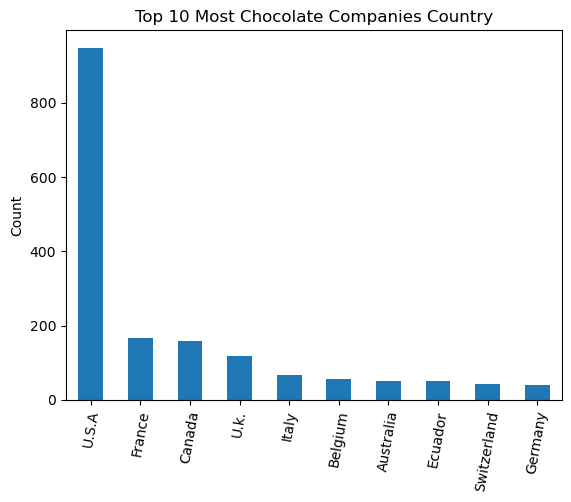

In [115]:
#Plot graph
choc['company_location'].value_counts().head(10).plot(kind='bar')

plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Top 10 Most Chocolate Companies Country')
plt.show()

USA has 948 chocolate companies in this dataset, following with 167 and 158 companies in France and Canada respectively.

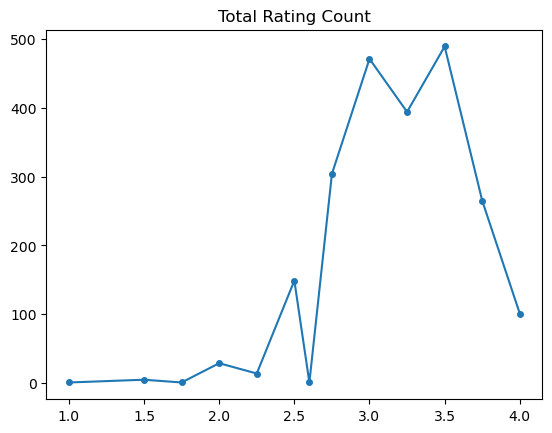

In [116]:
#Find out total rating count 
choc_rate=pd.DataFrame(choc.value_counts('rating')).reset_index()
choc_rate.sort_values(by=['rating'], ascending=True, inplace=True)
choc_rate.rename(columns={0:'count'}, inplace=True)

#Graph
plt.plot(choc_rate['rating'], choc_rate['count'], marker='.', markersize=8)
plt.title('Total Rating Count')
plt.show()

Most chocolate bar has the rating from range 3.0 to 3.5.

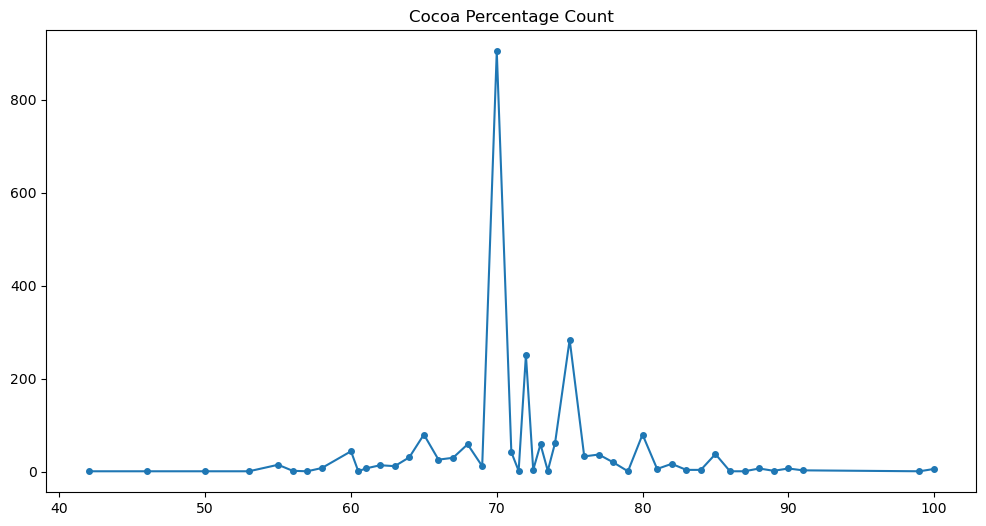

In [117]:
#Find out which percentage of cocoa has highest production
choc_cocoa=pd.DataFrame(choc.value_counts('cocoa_percent')).reset_index()
choc_cocoa.sort_values(by=['cocoa_percent'], ascending=True, inplace=True)
choc_cocoa.rename(columns={0:'counts'}, inplace=True)

#Graph
fig = plt.figure(figsize=(12, 6))
plt.plot(choc_cocoa['cocoa_percent'], choc_cocoa['counts'], marker='.', markersize=8)
plt.title('Cocoa Percentage Count')
plt.show()

Most of the chocolate bar are produced with 70-75% of cocoa.

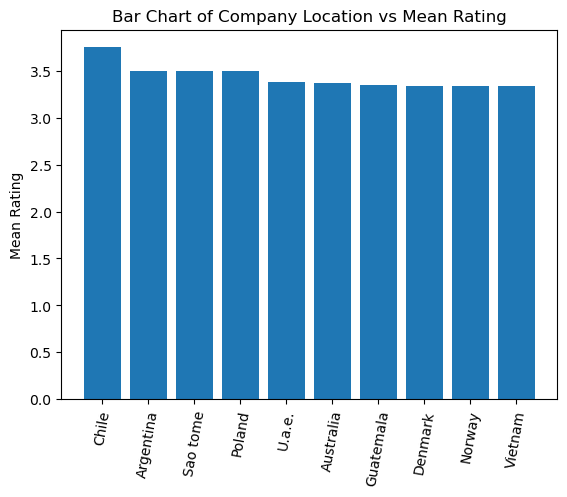

In [118]:
#Find out mean rating grouped by location
choc_mean=choc.groupby('company_location').mean()

#Reset index
choc_mean.reset_index(inplace=True)

#Sort rating
rating_sort = choc_mean.sort_values(by=['rating'], ascending=False).head(10)

#Graph
plt.bar(rating_sort['company_location'], rating_sort['rating'])
plt.xticks(rotation=80)
plt.ylabel('Mean Rating')
plt.title('Bar Chart of Company Location vs Mean Rating')
plt.show()

Chocolate bars produced in Chile have the most mean rating, which is 3.75. 

In [119]:
#Find the correlation
choc.corr()

,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
cocoa_percent,1.000000,-0.078508,-0.189490,NaN,-0.107737,-0.126034,-0.151743,-0.028162,-0.085909,0.008893
rating,-0.078508,1.000000,-0.094850,NaN,0.012224,-0.164881,-0.070179,-0.051381,0.092216,-0.087438
counts_of_ingredients,-0.189490,-0.094850,1.000000,NaN,0.751362,0.687676,0.738399,0.182218,0.041659,-0.012713
beans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cocoa_butter,-0.107737,0.012224,0.751362,NaN,1.000000,0.259114,0.313168,0.079541,0.075317,-0.061312
vanilla,-0.126034,-0.164881,0.687676,NaN,0.259114,1.000000,0.364437,0.040741,0.018593,-0.012890
lecithin,-0.151743,-0.070179,0.738399,NaN,0.313168,0.364437,1.000000,-0.025389,0.073489,-0.068447
salt,-0.028162,-0.051381,0.182218,NaN,0.079541,0.040741,-0.025389,1.000000,-0.366304,0.381888
sugar,-0.085909,0.092216,0.041659,NaN,0.075317,0.018593,0.073489,-0.366304,1.000000,-0.961374
sweetener_without_sugar,0.008893,-0.087438,-0.012713,NaN,-0.061312,-0.012890,-0.068447,0.381888,-0.961374,1.000000


Both cocoa percent and counts of ingredients have weak correlation with ratings.

### Categorical Variables

In [120]:
#Get dummies variables for the categorical variables
choc_dum = pd.get_dummies(data = choc, columns = ['company', 'company_location','country_of_bean_origin','specific_bean_origin_or_bar_name','first_taste', 'second_taste'], 
                               prefix = ['company', 'company_location','country_of_bean_origin','specific_bean_origin_or_bar_name','first_taste', 'second_taste'] )
choc_dum.head()

,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,...,second_taste_vinegar,second_taste_watering,second_taste_waxy,second_taste_well developed,second_taste_wet,second_taste_wine,second_taste_winey,second_taste_woodsy,second_taste_woody,second_taste_yogurt
0,76.0,3.75,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,76.0,3.50,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,76.0,3.25,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,63.0,3.75,4,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,70.0,3.50,4,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
#Check shape
choc_dum.shape

(2224, 2972)

In [122]:
#Transfer rating into two classes where '1' represent good chocolate and '0' represent fair chocolate 
def transfer_rate(x):
    if float(x) >= 3.5:
        return 1
    else:
        return 0

In [123]:
choc_dum['rating'] = choc_dum['rating'].apply(lambda x: transfer_rate(x))
choc_dum

,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,...,second_taste_vinegar,second_taste_watering,second_taste_waxy,second_taste_well developed,second_taste_wet,second_taste_wine,second_taste_winey,second_taste_woodsy,second_taste_woody,second_taste_yogurt
0,76.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,76.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,76.0,0,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,63.0,1,4,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,70.0,1,4,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,80.0,0,4,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2220,75.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2221,72.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2222,70.0,0,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
choc_dum['rating'].value_counts()

0    1369
1     855
Name: rating, dtype: int64

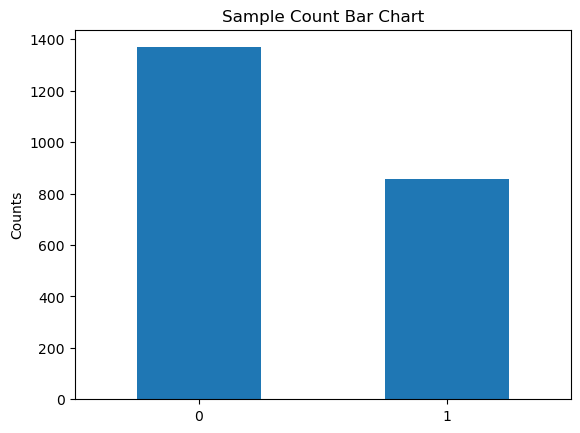

In [125]:
#Plot bar chart
choc_dum['rating'].value_counts().plot.bar()
plt.xticks(rotation=360)
plt.ylabel('Counts')
plt.title('Sample Count Bar Chart')
plt.show()

## Feature Selection

In [126]:
X=choc_dum.drop(columns=['rating'])
y=choc_dum['rating']

# Build Model
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6)

## Classification Algorithms
Classification is the supervised learning task for modeling and predicting categorical variables.
### Support Vector Machine (SVM)
SVM uses a mechanism called kernels, which calculate the distance beytween two observations and then finds a decision boundary that can maximizes the distance between the closest members of separate classes. It assumes data is independent and identically ditributed.


Strength: SMV can model non-linear decision boundaries and works well in high-dimensial space.

Weeaknesses: SVM is slow to train and do not scale well to larger dataset.

In [127]:
svm= SVC(probability=True)

#Fit model
svm.fit(X_train, y_train)

SVC(probability=True)

In [128]:
# Score
print('Train SVM score: ', svm.score(X_train, y_train))
print('Test SVM score: ',svm.score(X_test, y_test))

Train SVM score:  0.6205035971223022
Test SVM score:  0.6007194244604317


In [129]:
y_svm_pred = svm.predict(X_test)

#confusion matrix
confusion_matrix(y_test, y_svm_pred)

array([[334,   0],
       [222,   0]], dtype=int64)

In [130]:
#classification report
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       334
           1       0.00      0.00      0.00       222

    accuracy                           0.60       556
   macro avg       0.30      0.50      0.38       556
weighted avg       0.36      0.60      0.45       556



C:\Users\Jacynn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jacynn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jacynn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### GridSearch for SVM

In [131]:
svm_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [132]:
gsc_svm = GridSearchCV(SVC(),svm_params,cv=5, verbose=1)
gsc_svm.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [133]:
print('GSC Train SVM score: ', gsc_svm.score(X_train, y_train))
print('GSC Test SVM score: ', gsc_svm.score(X_test, y_test))

GSC Train SVM score:  0.8968824940047961
GSC Test SVM score:  0.6870503597122302


In [134]:
gsc_svm_pred = gsc_svm.predict(X_test)
print(classification_report(y_test,gsc_svm_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       334
           1       0.68      0.41      0.51       222

    accuracy                           0.69       556
   macro avg       0.68      0.64      0.64       556
weighted avg       0.68      0.69      0.67       556



In [135]:
confusion_matrix(y_test, gsc_svm_pred)

array([[290,  44],
       [130,  92]], dtype=int64)

In [136]:
print(gsc_svm.best_params_)
print(gsc_svm.best_score_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.6972451493409577


Before GridSearch: Train Score = 0.62, Test Score = 0.60, Confusion Matrix = [[334,0], [222,0]], Precision = 0.36, Recall = 0.60

### Logistic Regression
Logistic regression is the classification counterpart to linear regression. The prediction can be interpreted as class probabilities when the predictions are to be mapped between 0 and 1 through logistic function. It assumes that there is minimal or no multicollinearity among variables and assumes that the observations to be independent of each other.

Strength: Logistic regression is easy to interpret, implement, train and can easily accommodate new data points. 

Weakness: Logistic regression tends to underperform when there are multiple or non-liear decisions boundaries. It requires a large sample size to. predict properly.

In [137]:
log = LogisticRegression(max_iter=10000)

# Fit Model
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [138]:
# Score
print('Train Log score: ', log.score(X_train, y_train))
print('Test Log score: ',log.score(X_test, y_test))

Train Log score:  0.9388489208633094
Test Log score:  0.697841726618705


In [139]:
y_log_pred = log.predict(X_test)

#confusion matrix
confusion_matrix(y_test, y_log_pred)

array([[288,  46],
       [122, 100]], dtype=int64)

In [140]:
#classification report
print(classification_report(y_test, y_log_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       334
           1       0.68      0.45      0.54       222

    accuracy                           0.70       556
   macro avg       0.69      0.66      0.66       556
weighted avg       0.70      0.70      0.68       556



#### Grid Search for Logistic Regression

In [141]:
log_params = {
    'penalty': ['l2'],
    'C': [0.001,0.01,0.1,1.0]
}

In [142]:
gsc_log = GridSearchCV(LogisticRegression(max_iter=10000), log_params, cv=5, verbose=1)
gsc_log.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0], 'penalty': ['l2']},
             verbose=1)

In [143]:
print('GSC Train Log score: ', gsc_log.score(X_train, y_train))
print('GSC Test Log score: ', gsc_log.score(X_test, y_test))

GSC Train Log score:  0.9388489208633094
GSC Test Log score:  0.697841726618705


In [144]:
confusion_matrix(y_test, gsc_log_pred)

array([[288,  46],
       [122, 100]], dtype=int64)

In [145]:
gsc_log_pred = gsc_log.predict(X_test)
print(classification_report(y_test, gsc_log_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       334
           1       0.68      0.45      0.54       222

    accuracy                           0.70       556
   macro avg       0.69      0.66      0.66       556
weighted avg       0.70      0.70      0.68       556



In [146]:
print(gsc_log.best_params_)
print(gsc_log.best_score_)

{'C': 1.0, 'penalty': 'l2'}
0.702634370897844


After using GridSearch to find the best parameters, all results remain unchanged.

### Naive Bayes(NB)
NB is a very simple algorithm based around conditional probability and counting. The only assumption of NB is the assumption of conditional independence.

Strength: NB provides high preformance when the conditional independence assumption is satisfied. It works well with high dimentional data and works fast in real-time predictions.

Weakness: NB perform poorly if conditional independence does not hold.

In [147]:
nb = GaussianNB()

#Fit Model
nb.fit(X_train, y_train)

GaussianNB()

In [148]:
# Score
print('Train NB score: ', nb.score(X_train, y_train))
print('Test NB score: ',nb.score(X_test, y_test))

Train NB score:  0.935251798561151
Test NB score:  0.6115107913669064


In [149]:
y_nb_pred = nb.predict(X_test)

#confusion matrix
confusion_matrix(y_test, y_nb_pred)

array([[185, 149],
       [ 67, 155]], dtype=int64)

In [150]:
#classification report
print(classification_report(y_test, y_nb_pred))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63       334
           1       0.51      0.70      0.59       222

    accuracy                           0.61       556
   macro avg       0.62      0.63      0.61       556
weighted avg       0.64      0.61      0.61       556



### ROC Curve

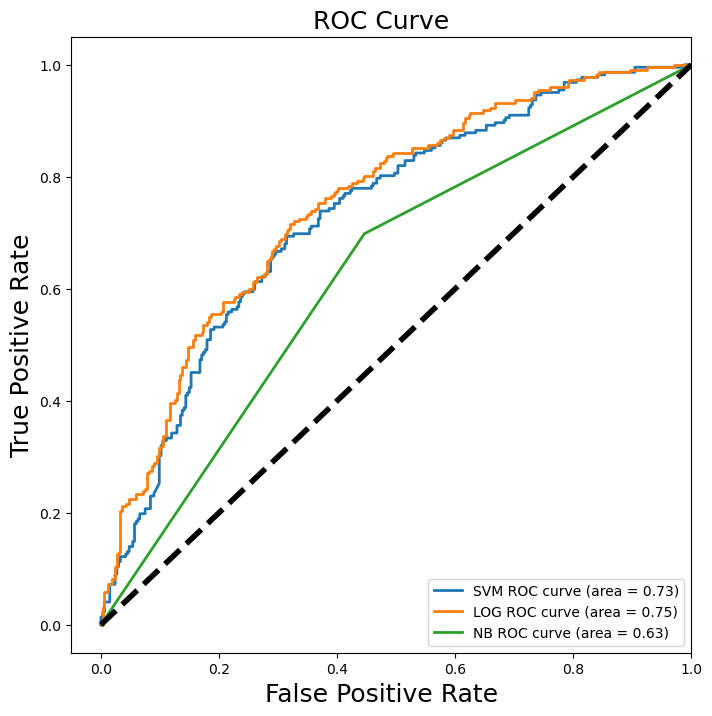

In [151]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
y_svm_pp = svm.predict_proba(X_test)[:,1]
y_log_pp = log.predict_proba(X_test)[:,1]
y_nb_pp = nb.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_svm_pp, pos_label=1)
log_fpr, log_tpr, _ = roc_curve(y_test, y_log_pp, pos_label=1)
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_nb_pp, pos_label=1)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_svm_auc = metrics.auc(svm_fpr, svm_tpr)
roc_log_auc = metrics.auc(log_fpr, log_tpr)
roc_nb_auc = metrics.auc(nb_fpr, nb_tpr)

# Plot ROC Curve
plt.figure(figsize=[8,8])
lw=2
plt.plot(svm_fpr, svm_tpr, lw = lw, label = 'SVM ROC curve (area = %0.2f)' % roc_svm_auc)
plt.plot(log_fpr, log_tpr, lw = lw, label = 'LOG ROC curve (area = %0.2f)' % roc_log_auc)
plt.plot(nb_fpr, nb_tpr, lw = lw, label = 'NB ROC curve (area = %0.2f)' % roc_nb_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Resampling Dataset

In [152]:
choc_minority = choc_dum[(choc_dum['rating'] == 1)]
choc_minority

,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,...,second_taste_vinegar,second_taste_watering,second_taste_waxy,second_taste_well developed,second_taste_wet,second_taste_wine,second_taste_winey,second_taste_woodsy,second_taste_woody,second_taste_yogurt
0,76.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,76.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,63.0,1,4,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,70.0,1,4,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,70.0,1,4,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,65.0,1,4,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2212,70.0,1,4,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2213,58.0,1,4,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2220,75.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
choc_majority = choc_dum[(choc_dum['rating'] == 0)]
choc_majority

,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,...,second_taste_vinegar,second_taste_watering,second_taste_waxy,second_taste_well developed,second_taste_wet,second_taste_wine,second_taste_winey,second_taste_woodsy,second_taste_woody,second_taste_yogurt
2,76.0,0,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,70.0,0,4,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,70.0,0,4,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,70.0,0,4,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,70.0,0,4,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,75.0,0,4,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2218,75.0,0,4,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2219,80.0,0,4,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2222,70.0,0,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
choc_minority_upsampled = resample(choc_minority, 
                                replace=True,  
                                n_samples= 1369, 
                                random_state=42)
choc_minority_upsampled

,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,...,second_taste_vinegar,second_taste_watering,second_taste_waxy,second_taste_well developed,second_taste_wet,second_taste_wine,second_taste_winey,second_taste_woodsy,second_taste_woody,second_taste_yogurt
226,72.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1075,72.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
680,70.0,1,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
240,68.0,1,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
148,72.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,58.0,1,5,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
304,70.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
472,68.0,1,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1075,72.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
choc_upsampled = pd.concat([choc_minority_upsampled, choc_majority])
choc_upsampled

,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,...,second_taste_vinegar,second_taste_watering,second_taste_waxy,second_taste_well developed,second_taste_wet,second_taste_wine,second_taste_winey,second_taste_woodsy,second_taste_woody,second_taste_yogurt
226,72.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1075,72.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
680,70.0,1,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
240,68.0,1,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
148,72.0,1,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,75.0,0,4,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2218,75.0,0,4,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2219,80.0,0,4,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2222,70.0,0,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
#check upsampled data count
choc_upsampled['rating'].value_counts()

1    1369
0    1369
Name: rating, dtype: int64

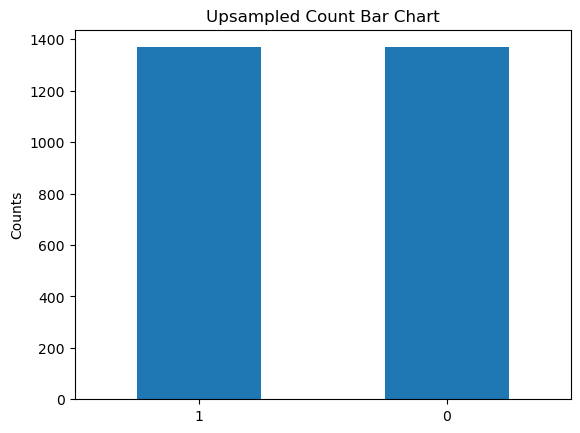

In [157]:
#Plot bar chart
choc_upsampled['rating'].value_counts().plot.bar()
plt.xticks(rotation=360)
plt.ylabel('Counts')
plt.title('Upsampled Count Bar Chart')
plt.show()

## Feature Selection with Resampled Dataset

In [158]:
X=choc_upsampled.drop(columns=['rating'])
y=choc_upsampled['rating']

In [159]:
#Build model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=6)

### SVM with Resample Dataset

In [160]:
svm_resample = SVC(probability=True)

#Fit model
svm_resample.fit(X_train, y_train)

SVC(probability=True)

In [161]:
# Score
print('Resample SVM train score: ', svm_resample.score(X_train, y_train))
print('Resample SVM test score: ', svm_resample.score(X_test, y_test))

Resample SVM train score:  0.5310502283105023
Resample SVM test score:  0.49635036496350365


In [162]:
y_svm_pred = svm_resample.predict(X_test)

#confusion matrix
confusion_matrix(y_test, y_svm_pred)

array([[ 15, 261],
       [ 15, 257]], dtype=int64)

In [163]:
#classification report
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.50      0.05      0.10       276
           1       0.50      0.94      0.65       272

    accuracy                           0.50       548
   macro avg       0.50      0.50      0.37       548
weighted avg       0.50      0.50      0.37       548



Before resampling: Train Score = 0.89, Test Score = 0.68, Confusion Matrix = [[290,44], [130,92]], Precision = 0.68, Recall = 0.69

### Logistic Regression with Resample Dataset

In [164]:
log_resample = LogisticRegression(max_iter=10000)

#Fit model
log_resample.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [165]:
# Score
print('Resample Log train score: ', log_resample.score(X_train, y_train))
print('Resample Log test score: ', log_resample.score(X_test, y_test))

Resample Log train score:  0.9488584474885845
Resample Log test score:  0.7846715328467153


In [166]:
y_log_pred = log_resample.predict(X_test)

#confusion matrix
confusion_matrix(y_test, y_log_pred)

array([[201,  75],
       [ 43, 229]], dtype=int64)

In [168]:
#classification report
print(classification_report(y_test, y_log_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       276
           1       0.75      0.84      0.80       272

    accuracy                           0.78       548
   macro avg       0.79      0.79      0.78       548
weighted avg       0.79      0.78      0.78       548



Before resampling: Train Score = 0.93, Test Score = 0.69, Confusion Matrix = [[288,46], [122,100]], Precision = 0.70, Recall = 0.70

### Naive Bayes with Resample Dataset

In [169]:
nb_resample= GaussianNB()

#Fit model
nb_resample.fit(X_train, y_train)

GaussianNB()

In [170]:
# Score
print('Resample NB train score: ', nb_resample.score(X_train, y_train))
print('Resample NB test score: ', nb_resample.score(X_test, y_test))

Resample NB train score:  0.9470319634703196
Resample NB test score:  0.7445255474452555


In [171]:
y_nb_pred = nb_resample.predict(X_test)

#confusion matrix
confusion_matrix(y_test, y_nb_pred)

array([[149, 127],
       [ 13, 259]], dtype=int64)

In [172]:
#classification report
print(classification_report(y_test, y_nb_pred))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68       276
           1       0.67      0.95      0.79       272

    accuracy                           0.74       548
   macro avg       0.80      0.75      0.73       548
weighted avg       0.80      0.74      0.73       548



Before resampling: Train Score = 0.93, Test Score = 0.61, Confusion Matrix = [[185, 149], [67,155]], Precision = 0.64, Recall = 0.61

### ROC Curve with Resample Dataset

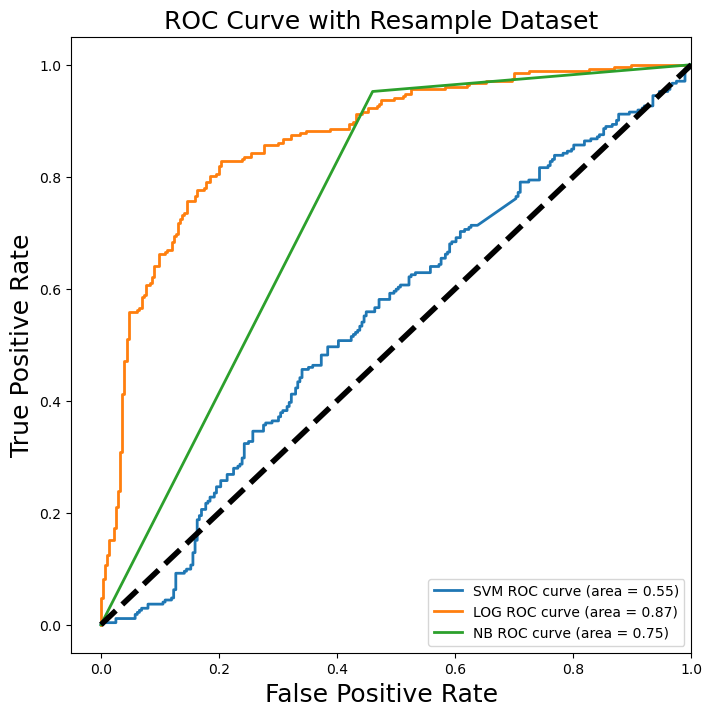

In [173]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
y_svm_pp = svm_resample.predict_proba(X_test)[:,1]
y_log_pp = log_resample.predict_proba(X_test)[:,1]
y_nb_pp = nb_resample.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_svm_pp, pos_label=1)
log_fpr, log_tpr, _ = roc_curve(y_test, y_log_pp, pos_label=1)
nb_fpr, nb_tpr, _ = roc_curve(y_test, y_nb_pp, pos_label=1)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_svm_auc = metrics.auc(svm_fpr, svm_tpr)
roc_log_auc = metrics.auc(log_fpr, log_tpr)
roc_nb_auc = metrics.auc(nb_fpr, nb_tpr)

# Plot ROC Curve
plt.figure(figsize=[8,8])
lw=2
plt.plot(svm_fpr, svm_tpr, lw = lw, label = 'SVM ROC curve (area = %0.2f)' % roc_svm_auc)
plt.plot(log_fpr, log_tpr, lw = lw, label = 'LOG ROC curve (area = %0.2f)' % roc_log_auc)
plt.plot(nb_fpr, nb_tpr, lw = lw, label = 'NB ROC curve (area = %0.2f)' % roc_nb_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve with Resample Dataset', fontsize=18)
plt.legend(loc="lower right")
plt.show()

Before resampling:
SVM ROC (area=0.73), LOG ROC (area = 0.75), NB ROC (area = 0.63)

## Conclusion
#### The run of three models performances were not too great - can we improve it? 

GridSearch was used to find the best paramaters for each models. And YES, we did saw an increase performance in the Support Vector Machine (SVM). But no improvement shown in Logistic Regression.

As we have imbalance dataset, we tried to resampled the data and re-evaluated with the models. YES, we saw an improvement in both Logistic Regression and Naive Bayes models. No improvement shown in the SVM models.

Based on the results and what we've done above, I would recommend the Logistic Regression models.



### References
https://www.kaggle.com/datasets/soroushghaderi/chocolate-bar-2020

https://elitedatascience.com/machine-learning-algorithms#classification

https://medium.com/swlh/its-all-about-assumptions-pros-cons-497783cfed2d